In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import json

In [2]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
pd.set_option('display.max_columns', None)

In [3]:
with open('../config/lyft_conection.json', 'r') as file:
    credenciales_lyft = json.load(file)

engine = create_engine(f"mysql+pymysql://{credenciales_lyft['USERNAME']}:{credenciales_lyft['PASSWORD']}@{credenciales_lyft['SERVER']}/{credenciales_lyft['DATABASE']}")

#### Nuevos usuarios

In [4]:
start_date = '2024-01-01 00:00:00'
end_date = '2025-12-31 23:59:59'

In [5]:
sql_BikeMemberFact = f'''

SELECT 
    id,
    creationDate
FROM BikeMemberFact
WHERE 
	creationDate BETWEEN UNIX_TIMESTAMP(CONVERT_TZ("{start_date}", "America/Mexico_City", 'UTC'))*1000
    AND UNIX_TIMESTAMP(CONVERT_TZ("{end_date}", "America/Mexico_City", 'UTC'))*1000;

'''

df_sql_BikeMemberFact = pd.read_sql(sql_BikeMemberFact, engine)
df_sql_BikeMemberFact.head()

,id,creationDate
0,339200,1704089393592
1,339201,1704090499764
2,339202,1704091268087
3,339203,1704093780793
4,339204,1704094841290


In [6]:
# convertir fecha de creación a formato datetime
df_sql_BikeMemberFact['creationDate'] = pd.to_datetime(df_sql_BikeMemberFact['creationDate'], unit='ms')
# extraer año
df_sql_BikeMemberFact['year'] = df_sql_BikeMemberFact['creationDate'].dt.year
# extraer mes
df_sql_BikeMemberFact['month'] = df_sql_BikeMemberFact['creationDate'].dt.month
df_sql_BikeMemberFact.head()

,id,creationDate,year,month
0,339200,2024-01-01 06:09:53.592,2024,1
1,339201,2024-01-01 06:28:19.764,2024,1
2,339202,2024-01-01 06:41:08.087,2024,1
3,339203,2024-01-01 07:23:00.793,2024,1
4,339204,2024-01-01 07:40:41.290,2024,1


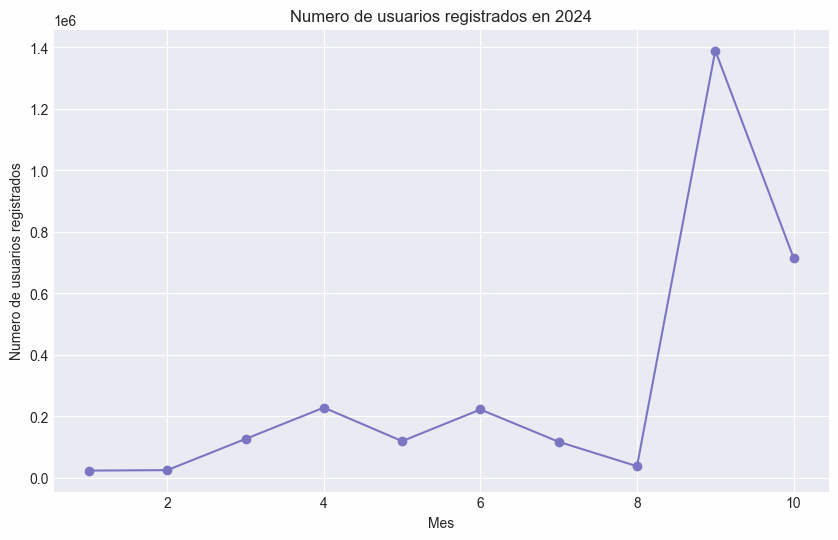

Numero de usuarios registrados en 2024: 3005029


In [7]:
# graficar la cantidad de miembros unicos solo en 2024
df_2024 = df_sql_BikeMemberFact[(df_sql_BikeMemberFact['year'] == 2024) & (df_sql_BikeMemberFact['month'] < 11)]
members_per_month_2024 = df_2024.groupby('month')['id'].nunique()
plt.figure(figsize=(10,6))
plt.plot(members_per_month_2024.index, members_per_month_2024.values, marker='o')
plt.title('Numero de usuarios registrados en 2024')
plt.xlabel('Mes')
plt.ylabel('Numero de usuarios registrados')
plt.show()

print("Numero de usuarios registrados en 2024:", df_2024['id'].nunique())


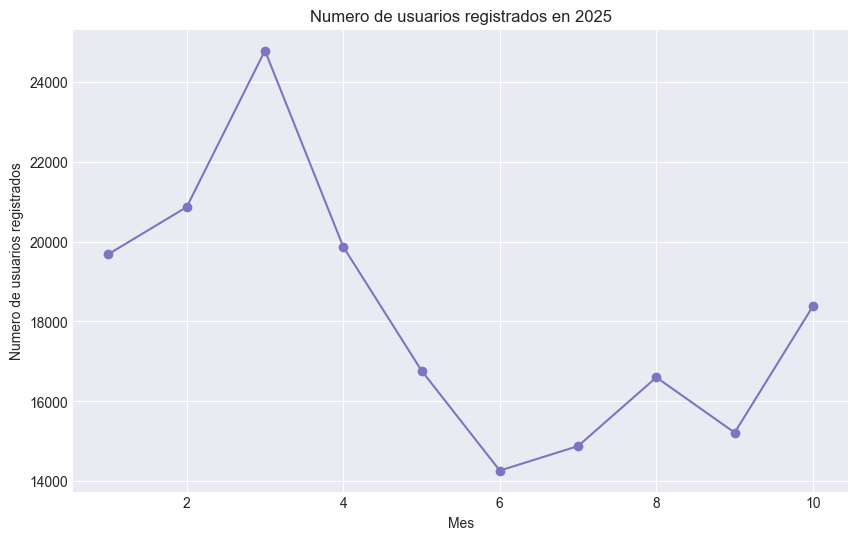

Numero de usuarios registrados en 2025: 181318


In [8]:
# graficar la cantidad de miembros unicos solo en 2024
df_2025 = df_sql_BikeMemberFact[(df_sql_BikeMemberFact['year'] == 2025) & (df_sql_BikeMemberFact['month'] < 11)]
members_per_month_2025 = df_2025.groupby('month')['id'].nunique()
plt.figure(figsize=(10,6))
plt.plot(members_per_month_2025.index, members_per_month_2025.values, marker='o')
plt.title('Numero de usuarios registrados en 2025')
plt.xlabel('Mes')
plt.ylabel('Numero de usuarios registrados')
plt.show()

print("Numero de usuarios registrados en 2025:", df_2025['id'].nunique())

#### Nuevas suscripciones/Renovaciones

In [9]:
sql_BikeSubscriptionFact = f'''

SELECT 
    id,
    purchase
FROM BikeSubscriptionFact
WHERE 
	purchase BETWEEN UNIX_TIMESTAMP(CONVERT_TZ("{start_date}", "America/Mexico_City", 'UTC'))*1000
    AND UNIX_TIMESTAMP(CONVERT_TZ("{end_date}", "America/Mexico_City", 'UTC'))*1000;

'''

df_sql_BikeSubscriptionFact = pd.read_sql(sql_BikeSubscriptionFact, engine)
df_sql_BikeSubscriptionFact.head()

,id,purchase
0,575878,1724911599941
1,909973,1756443608402
2,537404,1720501202525
3,875701,1752176959447
4,653133,1732255207933


In [10]:
# convertir fecha de creación a formato datetime
df_sql_BikeSubscriptionFact['creationDate'] = pd.to_datetime(df_sql_BikeSubscriptionFact['purchase'], unit='ms')
# extraer año
df_sql_BikeSubscriptionFact['year'] = df_sql_BikeSubscriptionFact['creationDate'].dt.year
# extraer mes
df_sql_BikeSubscriptionFact['month'] = df_sql_BikeSubscriptionFact['creationDate'].dt.month
df_sql_BikeSubscriptionFact.head()

,id,purchase,creationDate,year,month
0,575878,1724911599941,2024-08-29 06:06:39.941,2024,8
1,909973,1756443608402,2025-08-29 05:00:08.402,2025,8
2,537404,1720501202525,2024-07-09 05:00:02.525,2024,7
3,875701,1752176959447,2025-07-10 19:49:19.447,2025,7
4,653133,1732255207933,2024-11-22 06:00:07.933,2024,11


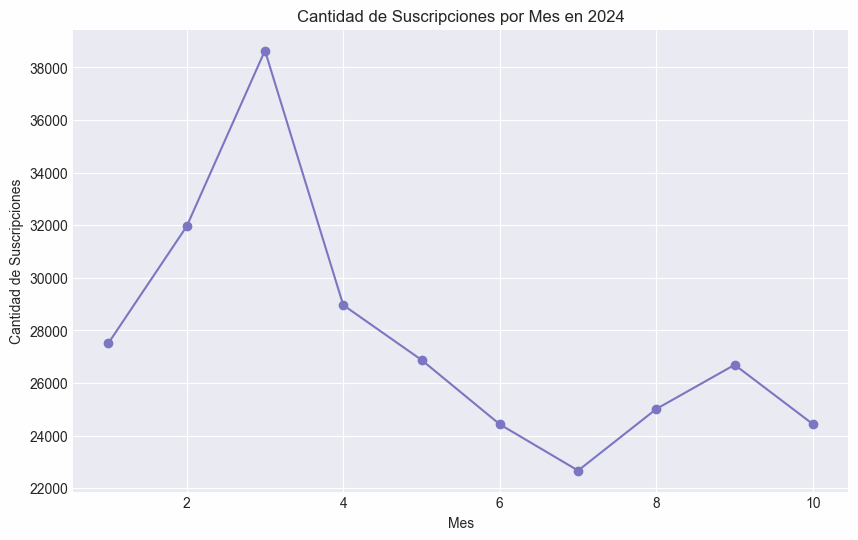

Numero de suscripciones en 2024: 277165


In [11]:
# graficar la cantidad se suscripciones solo en 2024 y mes menor a 11
df_subs_2024 = df_sql_BikeSubscriptionFact[(df_sql_BikeSubscriptionFact['year'] == 2024) & (df_sql_BikeSubscriptionFact['month'] < 11)]
members_per_month_2024 = df_subs_2024.groupby('month')['id'].nunique()
plt.figure(figsize=(10,6))
plt.plot(members_per_month_2024.index, members_per_month_2024.values, marker='o')
plt.title('Cantidad de Suscripciones por Mes en 2024')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Suscripciones')
plt.show()

print("Numero de suscripciones en 2024:", df_subs_2024.count()['id'])

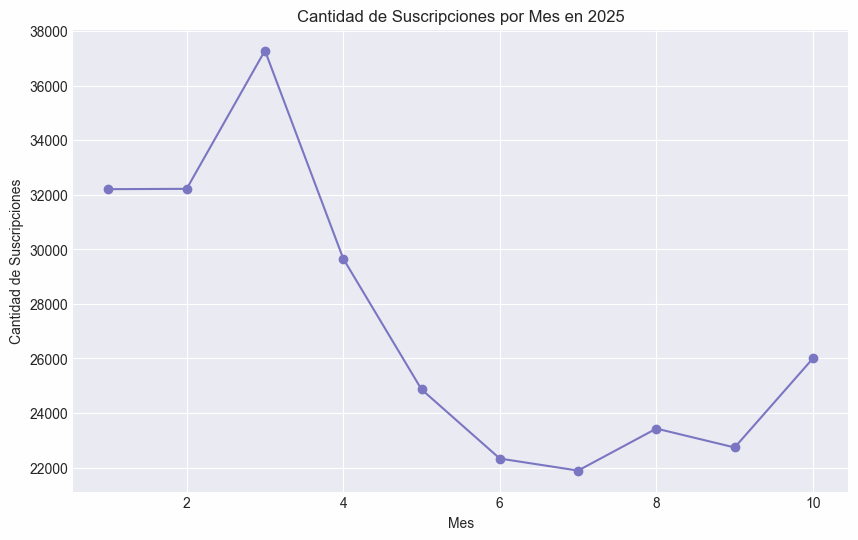

Numero de suscripciones en 2025: 272613


In [12]:
# graficar la cantidad se suscripciones solo en 2024
df_subs_2025 = df_sql_BikeSubscriptionFact[(df_sql_BikeSubscriptionFact['year'] == 2025) & (df_sql_BikeSubscriptionFact['month'] < 11)]
members_per_month_2025 = df_subs_2025.groupby('month')['id'].nunique()
plt.figure(figsize=(10,6))
plt.plot(members_per_month_2025.index, members_per_month_2025.values, marker='o')
plt.title('Cantidad de Suscripciones por Mes en 2025')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Suscripciones')
plt.show()

df_subs_2025.count()
print("Numero de suscripciones en 2025:", df_subs_2025.count()['id'])

#### Viajes

In [ ]:
sql_BikeRentalFact = f'''

SELECT 
    id,
    creationTimeMs,
    distanceInMeters,
    duration
FROM BikeRentalFact
WHERE 
	creationTimeMs BETWEEN UNIX_TIMESTAMP(CONVERT_TZ("{start_date}", "America/Mexico_City", 'UTC'))*1000
    AND UNIX_TIMESTAMP(CONVERT_TZ("{end_date}", "America/Mexico_City", 'UTC'))*1000;

'''

df_sql_BikeRentalFact = pd.read_sql(sql_BikeRentalFact, engine)
df_sql_BikeRentalFact.head()

In [ ]:
# convertir fecha de creación a formato datetime
df_sql_BikeRentalFact['creationDate'] = pd.to_datetime(df_sql_BikeRentalFact['creationTimeMs'], unit='ms')
# extraer año
df_sql_BikeRentalFact['year'] = df_sql_BikeRentalFact['creationDate'].dt.year
# extraer mes
df_sql_BikeRentalFact['month'] = df_sql_BikeRentalFact['creationDate'].dt.month

# converir metros a kilómetros
df_sql_BikeRentalFact['distanceInKm'] = df_sql_BikeRentalFact['distanceInMeters'] / 1000

df_sql_BikeRentalFact.head()

,id,creationTimeMs,distanceInMeters,duration,creationDate,year,month,distanceInKm
0,14281540,1704088913624,1216.0,834,2024-01-01 06:01:53.624,2024,1,1.216
1,14281541,1704088937791,1705.0,920,2024-01-01 06:02:17.791,2024,1,1.705
2,14281542,1704089070784,1159.0,443,2024-01-01 06:04:30.784,2024,1,1.159
3,14281543,1704089083558,3677.0,1421,2024-01-01 06:04:43.558,2024,1,3.677
4,14281544,1704089085754,3677.0,1433,2024-01-01 06:04:45.754,2024,1,3.677


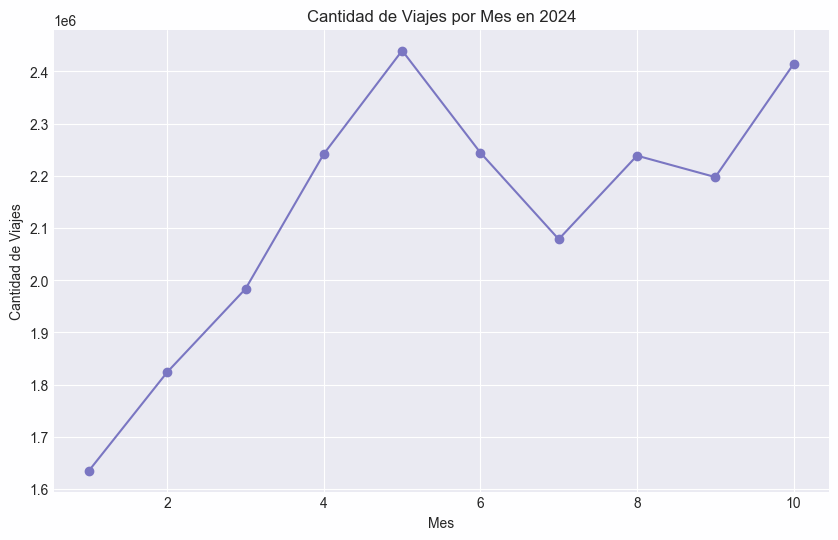

Numero de viajes en 2024: 21297145


In [ ]:
# graficar la cantidad se viaje solo en 2024 y mes menor a 11
df_rental_2024 = df_sql_BikeRentalFact[(df_sql_BikeRentalFact['year'] == 2024) & (df_sql_BikeRentalFact['month'] < 11)]
rental_per_month_2024 = df_rental_2024.groupby('month')['id'].nunique()
plt.figure(figsize=(10,6))
plt.plot(rental_per_month_2024.index, rental_per_month_2024.values, marker='o')
plt.title('Cantidad de Viajes por Mes en 2024')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Viajes')
plt.show()

print("Numero de viajes en 2024:", df_rental_2024.count()['id'])

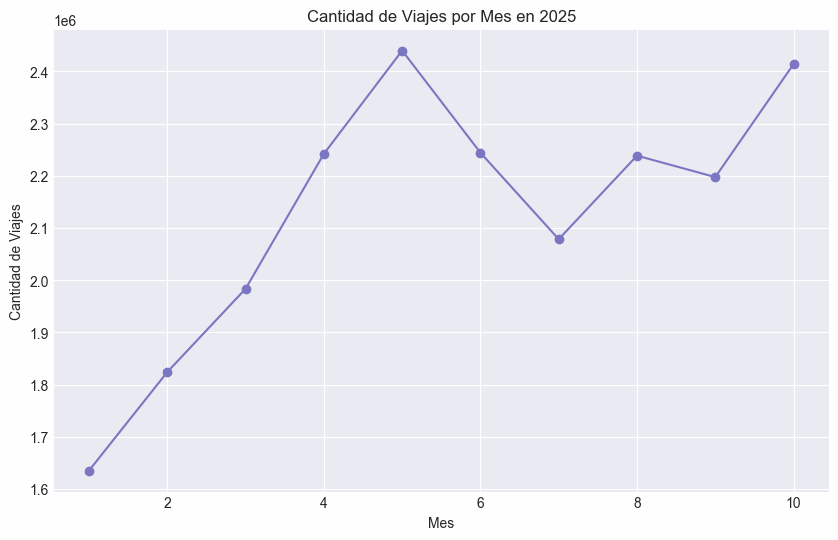

Numero de viajes en 2025: 20981657


In [ ]:
df_rental_2025 = df_sql_BikeRentalFact[(df_sql_BikeRentalFact['year'] == 2025) & (df_sql_BikeRentalFact['month'] < 11)]
rental_per_month_2025 = df_rental_2025.groupby('month')['id'].nunique()
plt.figure(figsize=(10,6))
plt.plot(rental_per_month_2024.index, rental_per_month_2024.values, marker='o')
plt.title('Cantidad de Viajes por Mes en 2025')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Viajes')
plt.show()

print("Numero de viajes en 2025:", df_rental_2025.count()['id'])

In [ ]:
km_2024 = df_rental_2024['distanceInMeters'].sum() / 1000
km_2025 = df_rental_2025['distanceInMeters'].sum() / 1000

print("Kilómetros recorridos en 2024:", km_2024)
print("Kilómetros recorridos en 2025:", km_2025)

Kilómetros recorridos en 2024: 35678805.779
Kilómetros recorridos en 2025: 32102763.112


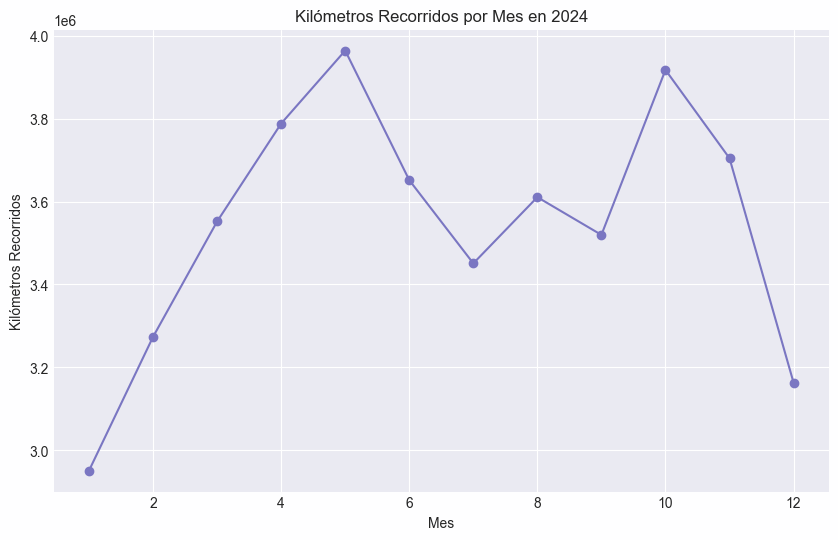

In [ ]:
# graficar kilometros recorridos por mes en 2024
km_per_month_2024 = df_sql_BikeRentalFact[df_sql_BikeRentalFact['year'] == 2024].groupby('month')['distanceInKm'].sum()
plt.figure(figsize=(10,6))
plt.plot(km_per_month_2024.index, km_per_month_2024.values, marker='o')
plt.title('Kilómetros Recorridos por Mes en 2024')
plt.xlabel('Mes')
plt.ylabel('Kilómetros Recorridos')
plt.show()

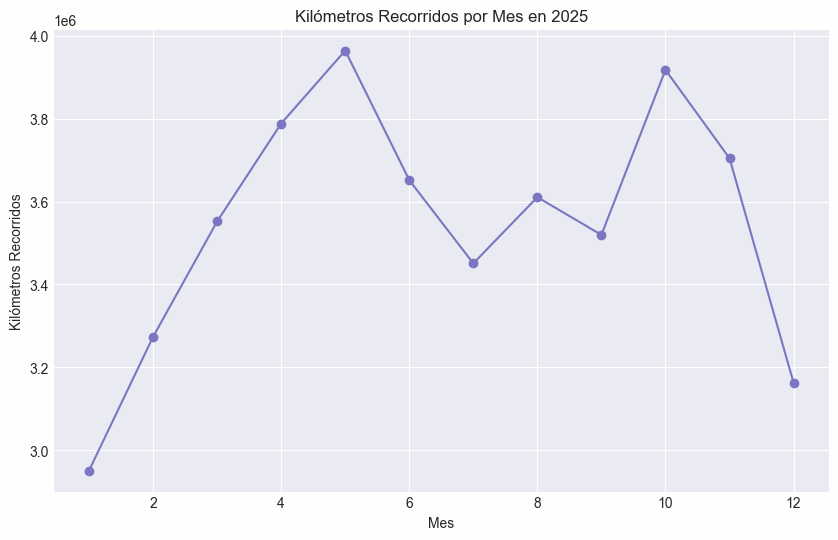

In [ ]:
# graficar kilometros recorridos por mes en 2025
km_per_month_2025 = df_sql_BikeRentalFact[df_sql_BikeRentalFact['year'] == 2025].groupby('month')['distanceInKm'].sum()
plt.figure(figsize=(10,6))
plt.plot(km_per_month_2024.index, km_per_month_2024.values, marker='o')
plt.title('Kilómetros Recorridos por Mes en 2025')
plt.xlabel('Mes')
plt.ylabel('Kilómetros Recorridos')
plt.show()